Построение композиции — важный подход в машинном обучении, который позволяет объединять большое количество слабых алгоритмов в один сильный. Данный подход широко используется на практике в самых разных задачах.

На лекциях был рассмотрен метод градиентного бустинга, который последовательно строит композицию алгоритмов, причем каждый следующий алгоритм выбирается так, чтобы исправлять ошибки уже имеющейся композиции. Обычно в качестве базовых алгоритмов используют деревья небольшой глубины, поскольку их достаточно легко строить, и при этом они дают нелинейные разделяющие поверхности.

Другой метод построения композиций — случайный лес. В нем, в отличие от градиентного бустинга, отдельные деревья строятся независимо и без каких-либо ограничений на глубину — дерево наращивается до тех пор, пока не покажет наилучшее качество на обучающей выборке.

В этом задании мы будем иметь дело с задачей классификации. В качестве функции потерь будем использовать log-loss:

Здесь через y обозначен истинный ответ, через z — прогноз алгоритма. Данная функция является дифференцируемой, и поэтому подходит для использования в градиентном бустинге. Также можно показать, что при ее использовании итоговый алгоритм будет приближать истинные вероятности классов.

Реализация в sklearn

В пакете scikit-learn градиентный бустинг реализован в модуле ensemble в виде классов GradientBoostingClassifier и GradientBoostingRegressor. Основные параметры, которые будут интересовать нас: n_estimators, learning_rate. Иногда может быть полезен параметр verbose для отслеживания процесса обучения.

Чтобы была возможность оценить качество построенной композиции на каждой итерации, у класса есть метод staged_decision_function. Для заданной выборки он возвращает ответ на каждой итерации.

Помимо алгоритмов машинного обучения, в пакете scikit-learn представлено большое число различных инструментов. В этом задании будет предложено воспользоваться функцией train_test_split модуля cross_validation. С помощью нее можно разбивать выборки случайным образом. На вход можно передать несколько выборок (с условием, что они имеют одинаковое количество строк). Пусть, например, имеются данные X и y, где X — это признаковое описание объектов, y — целевое значение. Тогда следующий код будет удобен для разбиения этих данных на обучающее и тестовое множества:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Обратите внимание, что при фиксированном параметре random_state результат разбиения можно воспроизвести.

Метрика log-loss реализована в пакете metrics: sklearn.metrics.log_loss. Заметим, что данная метрика предназначена для классификаторов, выдающих оценку принадлежности классу, а не бинарные ответы. И градиентный бустинг, и случайный лес умеют строить такие прогнозы — для этого нужно использовать метод predict_proba:

pred = clf.predict_proba(X_test)

Метод predict_proba возвращает матрицу, i-й столбец которой содержит оценки принадлежности i-му классу. 

Для рисования кривых качества на обучении и контроле можно воспользоваться следующим кодом:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
plt.plot(train_loss, 'g', linewidth=2)
plt.legend(['test', 'train'])

Данные

В рамках данного задания мы рассмотрим датасет с конкурса Predicting a Biological Response.
Инструкция по выполнению

    Загрузите выборку из файла gbm-data.csv с помощью pandas и преобразуйте ее в массив numpy (параметр values у датафрейма). В первой колонке файла с данными записано, была или нет реакция. Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы, такие как размер, форма и т.д. Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241. 

    Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

    Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.

    Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.

    Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и номер итерации, на которой оно достигается.

3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

4. Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.42. При необходимости округляйте дробную часть до двух знаков.

Обратите внимание, что, хотя в градиентного бустинге гораздо более слабые базовые алгоритмы, он выигрывает у случайного леса благодаря более "направленной" настройке — каждый следующий алгоритм исправляет ошибки имеющейся композиции. Также он обучается быстрее случайного леса благодаря использованию неглубоких деревьев. В то же время, случайный лес может показать более высокое качество при неограниченных ресурсах — так, он выиграет у градиентного бустинга на наших данных, если увеличить число деревьев до нескольких сотен (проверьте сами!).

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
data = pd.read_csv('data/gbm-data.csv', sep=',')
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = data.values[:, 0]
y

array([1., 1., 1., ..., 0., 1., 0.])

In [5]:
X = np.array(data.drop(['Activity'], axis = 1))
X

array([[0.        , 0.49700901, 0.1       , ..., 0.        , 0.        ,
        0.        ],
       [0.36666667, 0.60629148, 0.05      , ..., 0.        , 1.        ,
        0.        ],
       [0.0333    , 0.48012427, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.2       , 0.52056377, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1       , 0.7656462 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13333333, 0.53395198, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

    Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241 и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:

    Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.

    Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), где y_pred — предсказанное значение.

In [34]:
def learn(learning_rate, X_train, y_train, X_test, y_test):
    model = GradientBoostingClassifier(
        n_estimators=250,
#        verbose=True,
        random_state=241,
        learning_rate=learning_rate
        )
    model.fit(X_train, y_train)

    # plot scores
    test_score = list(range(250))
    train_score = list(range(250))

    for i, predictions in enumerate(model.staged_decision_function(X_test)):
        predictions = [x[0] for x in predictions.tolist()] # unpack this stupid format       
        predictions = [1 / (1 + math.exp(-x)) for x in predictions]
        test_score[i] = log_loss(y_test, predictions)

    for i, predictions in enumerate(model.staged_decision_function(X_train)):
        predictions = [x[0] for x in predictions.tolist()] # unpack this stupid format
        predictions = [1 / (1 + math.exp(-x)) for x in predictions]
        train_score[i] = log_loss(y_train, predictions)

    return train_score, test_score

      Iter       Train Loss   Remaining Time 
         1           1.0190           20.98s
         2           0.9192           18.31s
         3           0.8272           18.40s
         4           0.7834           18.56s
         5           0.7109           18.43s
         6           0.6368           18.49s
         7           0.5797           18.45s
         8           0.5610           18.43s
         9           0.5185           18.50s
        10           0.4984           18.29s
        20           0.1999           17.06s
        30           0.1313           16.20s
        40           0.0790           15.55s
        50           0.0511           14.75s
        60           0.0352           14.13s
        70           0.0245           13.44s
        80           0.0162           12.65s
        90           0.0114           11.87s
       100           0.0077           11.10s
       200           0.0002            3.64s


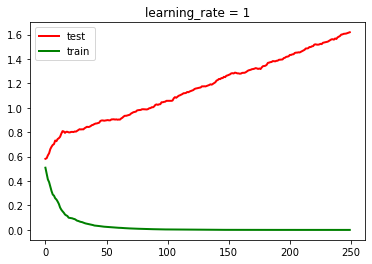

      Iter       Train Loss   Remaining Time 
         1           1.1255           20.35s
         2           1.0035           18.35s
         3           0.9386           17.83s
         4           0.8844           18.09s
         5           0.8381           17.97s
         6           0.7995           18.23s
         7           0.7559           18.11s
         8           0.7205           17.94s
         9           0.6958           17.88s
        10           0.6725           17.72s
        20           0.4672           16.79s
        30           0.3179           15.88s
        40           0.2274           15.36s
        50           0.1774           14.68s
        60           0.1394           14.12s
        70           0.1050           13.27s
        80           0.0805           12.46s
        90           0.0650           11.72s
       100           0.0511           10.98s
       200           0.0058            3.67s


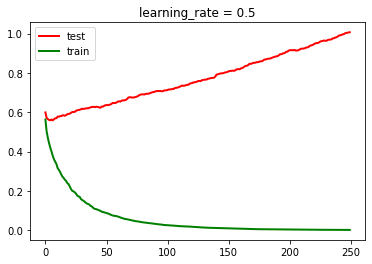

      Iter       Train Loss   Remaining Time 
         1           1.2095           20.00s
         2           1.1006           18.13s
         3           1.0240           18.24s
         4           0.9729           18.04s
         5           0.9387           17.99s
         6           0.8948           17.88s
         7           0.8621           17.85s
         8           0.8360           17.82s
         9           0.8171           17.87s
        10           0.7883           17.71s
        20           0.6029           16.71s
        30           0.4760           16.06s
        40           0.3879           15.37s
        50           0.3325           14.63s
        60           0.2759           13.90s
        70           0.2304           13.13s
        80           0.1969           12.38s
        90           0.1718           11.69s
       100           0.1404           10.93s
       200           0.0358            3.65s


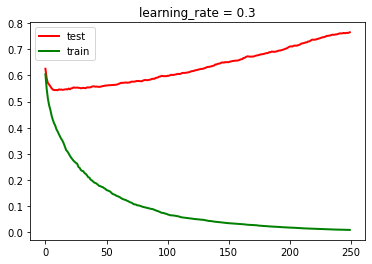

      Iter       Train Loss   Remaining Time 
         1           1.2613           21.40s
         2           1.1715           19.47s
         3           1.1009           18.70s
         4           1.0529           18.03s
         5           1.0130           17.73s
         6           0.9740           17.52s
         7           0.9475           17.72s
         8           0.9197           17.67s
         9           0.8979           17.93s
        10           0.8730           17.87s
        20           0.7207           17.09s
        30           0.6055           16.25s
        40           0.5244           15.51s
        50           0.4501           14.98s
        60           0.3908           14.18s
        70           0.3372           13.38s
        80           0.3009           12.59s
        90           0.2603           11.83s
       100           0.2327           11.09s
       200           0.0835            3.65s


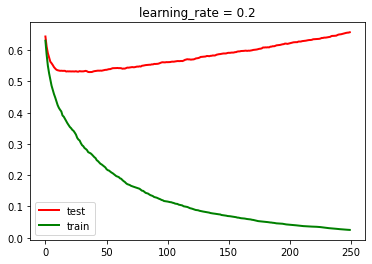

      Iter       Train Loss   Remaining Time 
         1           1.3199           19.49s
         2           1.2645           17.86s
         3           1.2170           17.72s
         4           1.1775           17.88s
         5           1.1404           17.67s
         6           1.1106           17.56s
         7           1.0844           17.23s
         8           1.0617           17.15s
         9           1.0411           17.02s
        10           1.0223           17.00s
        20           0.8864           16.16s
        30           0.7844           15.57s
        40           0.7176           14.84s
        50           0.6590           14.16s
        60           0.6120           13.56s
        70           0.5599           12.88s
        80           0.5242           12.21s
        90           0.4829           11.50s
       100           0.4473           10.82s
       200           0.2379            3.62s


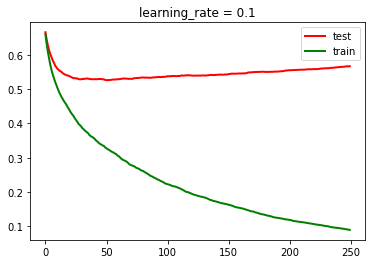

In [30]:
for lr in [1, 0.5, 0.3, 0.2, 0.1]:
    train_score, test_score = learn(lr, X_train, y_train, X_test, y_test)
    plt.figure()
    plt.plot(test_score, 'r', linewidth=2)
    plt.plot(train_score, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.title("learning_rate = %s" % lr)
    plt.show()

 Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации: переобучение (overfitting) или недообучение (underfitting)? 
 В ответе укажите одно из слов overfitting либо underfitting.

In [31]:
answer = "overfitting"
print(answer)
with open('lab_answ/lab13_1.txt', 'w') as outfile:
    outfile.write(answer)

overfitting


 Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, при learning_rate = 0.2.

In [37]:
lr = 0.2
train_score, test_score = learn(lr, X_train, y_train, X_test, y_test)

In [39]:
test_score = np.array(test_score)
n_iter = test_score.argmin()
min_score = test_score[n_iter]

In [40]:
answer = f'{round(min_score, 2)} {n_iter + 1}'
print(answer)
with open('lab_answ/lab13_2.txt', 'w') as outfile:
    outfile.write(answer)

0.53 37


На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. В данном случае брать сигмоиду от оценки вероятности класса не нужно)

In [43]:
clf = RandomForestClassifier(n_estimators=37, random_state=241)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=37, random_state=241)

In [47]:
predictions = clf.predict_proba(X_test)

In [48]:
test_score = log_loss(y_test, predictions)

In [50]:
answer = f'{round(test_score, 2)}'
print(answer)
with open('lab_answ/lab13_3.txt', 'w') as outfile:
    outfile.write(answer)

0.54


Обратите внимание, что, хотя в градиентного бустинге гораздо более слабые базовые алгоритмы, он выигрывает у случайного леса благодаря более "направленной" настройке — каждый следующий алгоритм исправляет ошибки имеющейся композиции. Также он обучается быстрее случайного леса благодаря использованию неглубоких деревьев. В то же время, случайный лес может показать более высокое качество при неограниченных ресурсах — так, он выиграет у градиентного бустинга на наших данных, если увеличить число деревьев до нескольких сотен (проверьте сами!).